## Advisory 
### If you have not yet begun the project 
Please do not use this workspace.  Use the AWS resources provided and the instructions from the [cloud computing lesson](https://classroom.udacity.com/nanodegrees/nd101/parts/b9c4c3c3-b524-427b-8832-9d0748f14a2e/modules/de12f7bf-d980-4998-ab91-0e411184c878/lessons/29df00d8-01c2-4995-92fa-a4afd020be90/concepts/80d2ed46-1bba-413e-891e-610259017251).
### If you have started on this workspace
Please consider downloading your Jupyter notebook and then following the instructions above on using AWS instead.  You can upload your current work to AWS through your GitHub account.  


As a reminder, the project can be found on the [deep learning GitHub page](https://github.com/udacity/deep-learning/tree/master/face_generation).
These warnings are given because the project frequently generates more data than the workspace can handle, causing loading problems and lost work.  Please use [the forums](https://discussions.udacity.com/c/nd101-part-5-GANs/nd101-generate-faces) if you have any questions on the project or its setup.


# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [25]:
data_dir = '/data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

In [26]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f0555513bf8> (for post_execute):


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

AttributeError: 'numpy.ndarray' object has no attribute 'mask'

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

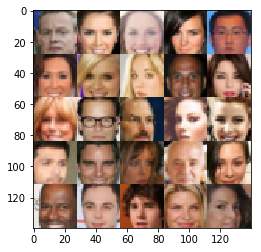

In [27]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [28]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [29]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_size = (image_width, image_height, image_channels)
    
    real_input = tf.placeholder(tf.float32, [None, *real_size], name="real_input")
    z_input = tf.placeholder(tf.float32, [None, z_dim], name='z_input')
    learning_rate = tf.placeholder(tf.float32, None, name="learning_rate")

    return real_input, z_input, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [53]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.08
    
    with tf.variable_scope("discriminator", reuse=reuse):
        #input_shape 28*28*3
        conv2d_1 = tf.layers.conv2d (images, filters=64, kernel_size=5, strides=2, padding="same")
        conv2d_1 = tf.maximum(alpha * conv2d_1, conv2d_1)
        conv2d_1 = tf.nn.dropout(conv2d_1, 0.7)
        #14*14*32
        
        conv2d_2 = tf.layers.conv2d(conv2d_1, filters=128, kernel_size=5, strides=2, padding="same")
        conv2d_2 = tf.layers.batch_normalization(conv2d_2, training=True)
        conv2d_2 = tf.maximum(alpha * conv2d_2, conv2d_2)
        conv2d_2 = tf.nn.dropout(conv2d_2, 0.7)
        #7*7*64
        
        conv2d_3 = tf.layers.conv2d(conv2d_2, filters=256, kernel_size=5, strides=2, padding="same")
        conv2d_3 = tf.layers.batch_normalization(conv2d_3, training=True)
        conv2d_3 = tf.maximum(alpha * conv2d_3, conv2d_3)
        conv2d_3 = tf.nn.dropout(conv2d_3, 0.7)
        #3.5*3.5*128
        
        flatten = tf.reshape(conv2d_3, (-1, 4*4*256))
        logits = tf.layers.dense(flatten, 1)
        output = tf.sigmoid(logits)
        
    
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [54]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.08
    with tf.variable_scope('generator', reuse = (not is_train)):
        
        dense_layer_1 = tf.layers.dense(z, 7*7*1024)
        dense_layer_1 = tf.reshape(dense_layer_1, (-1, 7, 7, 1024))
        dense_layer_1 = tf.layers.batch_normalization(dense_layer_1, training=is_train)
        dense_layer_1 = tf.maximum(alpha * dense_layer_1, dense_layer_1)
        dense_layer_1 = tf.nn.dropout(dense_layer_1, 0.3)
    
        conv2d_2 = tf.layers.conv2d_transpose(dense_layer_1, filters=512, kernel_size=5, strides=1, padding='same')
        conv2d_2 = tf.layers.batch_normalization(conv2d_2, training=is_train)
        conv2d_2 = tf.maximum(alpha * conv2d_2, conv2d_2)
        conv2d_2 = tf.nn.dropout(conv2d_2, 0.3)
    
        conv2d_3 = tf.layers.conv2d_transpose(conv2d_2, filters=256, kernel_size=5, strides=2, padding='same')
        conv2d_3 = tf.layers.batch_normalization(conv2d_3, training=is_train)
        conv2d_3 = tf.maximum(alpha * conv2d_3, conv2d_3)
        conv2d_3 = tf.nn.dropout(conv2d_3, 0.3)
        
        conv2d_4 = tf.layers.conv2d_transpose(conv2d_3, filters=128, kernel_size=5, strides=1, padding='same')
        conv2d_4 = tf.layers.batch_normalization(conv2d_4, training=is_train)
        conv2d_4 = tf.maximum(alpha * conv2d_4, conv2d_4)
        conv2d_4 = tf.nn.dropout(conv2d_4, 0.3)
    
        logits = tf.layers.conv2d_transpose(conv2d_4, filters=out_channel_dim, kernel_size=5, strides=2, padding="same")
        
        output = tf.tanh(logits)
    
        return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [52]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    
    generator_model = generator(input_z, out_channel_dim)
    discriminator_model_real, discriminator_logits_real = discriminator(input_real)
    discriminator_model_fake, discriminator_logits_fake = discriminator(generator_model, reuse=True)
    
    discriminator_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=discriminator_logits_real, labels=tf.ones_like(discriminator_model_real) * (1 - smooth)))
    
    discriminator_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=discriminator_logits_fake, labels=tf.zeros_like(discriminator_model_fake)))
    
    generator_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=discriminator_logits_fake, labels=tf.ones_like(discriminator_model_fake)))

    discriminator_loss = discriminator_loss_real + discriminator_loss_fake

    
    
    return discriminator_loss, generator_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [48]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    trainable_vars = tf.trainable_variables()
    discriminator_vars = [var for var in trainable_vars if var.name.startswith('discriminator')]
    generator_vars = [var for var in trainable_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        discriminator_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=discriminator_vars)
        generator_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=generator_vars)
        
    return discriminator_train_opt, generator_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [49]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

In [50]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    real_input, z_input, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    discriminator_loss, generator_loss = model_loss(real_input, z_input, data_shape[3])
    discriminator_opt, generator_opt = model_opt(discriminator_loss, generator_loss, lr, beta1)

    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                steps+=1
                
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(discriminator_opt, feed_dict={real_input: batch_images, z_input: batch_z, lr: learning_rate})
                _ = sess.run(generator_opt, feed_dict={real_input: batch_images, z_input: batch_z, lr: learning_rate})

                
                if steps % 10 == 0:
                    train_loss_d = discriminator_loss.eval({z_input:batch_z, real_input: batch_images})
                    train_loss_g = generator_loss.eval({z_input: batch_z})
                    
                    print(f"Epoch {epoch_i+1}/{epochs}...",
                          f"Batch {steps}..."
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                
                if steps % 100 == 0:
                    show_generator_output(sess, show_n_images, z_input, data_shape[3], data_image_mode)
                    
                

In [55]:
batch_size = 64
z_dim = 100
learning_rate = 0.0004
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

Epoch 1/2... Batch 10...Discriminator Loss: 0.7333... Generator Loss: 2.2408
Epoch 1/2... Batch 20...Discriminator Loss: 0.8935... Generator Loss: 1.7427
Epoch 1/2... Batch 30...Discriminator Loss: 0.7803... Generator Loss: 3.0463
Epoch 1/2... Batch 40...Discriminator Loss: 0.9233... Generator Loss: 1.7989
Epoch 1/2... Batch 50...Discriminator Loss: 0.4597... Generator Loss: 8.3813
Epoch 1/2... Batch 60...Discriminator Loss: 0.7909... Generator Loss: 2.2811
Epoch 1/2... Batch 70...Discriminator Loss: 0.5639... Generator Loss: 4.8602
Epoch 1/2... Batch 80...Discriminator Loss: 0.5941... Generator Loss: 4.6978
Epoch 1/2... Batch 90...Discriminator Loss: 0.8276... Generator Loss: 7.0830
Epoch 1/2... Batch 100...Discriminator Loss: 0.9602... Generator Loss: 1.7652


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 1/2... Batch 110...Discriminator Loss: 1.2043... Generator Loss: 1.6270
Epoch 1/2... Batch 120...Discriminator Loss: 1.2016... Generator Loss: 2.9653
Epoch 1/2... Batch 130...Discriminator Loss: 0.8762... Generator Loss: 2.1347
Epoch 1/2... Batch 140...Discriminator Loss: 1.2422... Generator Loss: 1.1712
Epoch 1/2... Batch 150...Discriminator Loss: 1.1608... Generator Loss: 1.0425
Epoch 1/2... Batch 160...Discriminator Loss: 1.2802... Generator Loss: 1.1413
Epoch 1/2... Batch 170...Discriminator Loss: 0.8865... Generator Loss: 2.8278
Epoch 1/2... Batch 180...Discriminator Loss: 1.0029... Generator Loss: 1.4088
Epoch 1/2... Batch 190...Discriminator Loss: 1.1913... Generator Loss: 1.1097
Epoch 1/2... Batch 200...Discriminator Loss: 0.9943... Generator Loss: 2.5695


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

Epoch 1/2... Batch 210...Discriminator Loss: 1.1782... Generator Loss: 0.7537


KeyboardInterrupt: 

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Batch 10...Discriminator Loss: 0.5752... Generator Loss: 2.5545
Epoch 1/1... Batch 20...Discriminator Loss: 0.5214... Generator Loss: 3.7684
Epoch 1/1... Batch 30...Discriminator Loss: 1.7828... Generator Loss: 0.9436
Epoch 1/1... Batch 40...Discriminator Loss: 0.7270... Generator Loss: 2.8641
Epoch 1/1... Batch 50...Discriminator Loss: 0.7713... Generator Loss: 7.2853
Epoch 1/1... Batch 60...Discriminator Loss: 0.5628... Generator Loss: 2.6885
Epoch 1/1... Batch 70...Discriminator Loss: 0.6274... Generator Loss: 3.0133
Epoch 1/1... Batch 80...Discriminator Loss: 2.3457... Generator Loss: 0.4401
Epoch 1/1... Batch 90...Discriminator Loss: 0.5537... Generator Loss: 3.0814
Epoch 1/1... Batch 100...Discriminator Loss: 0.5586... Generator Loss: 2.3526


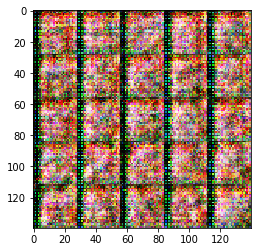

Epoch 1/1... Batch 110...Discriminator Loss: 0.4842... Generator Loss: 3.9937
Epoch 1/1... Batch 120...Discriminator Loss: 0.4187... Generator Loss: 4.3398
Epoch 1/1... Batch 130...Discriminator Loss: 0.3956... Generator Loss: 4.2080
Epoch 1/1... Batch 140...Discriminator Loss: 1.6695... Generator Loss: 0.7855
Epoch 1/1... Batch 150...Discriminator Loss: 0.5497... Generator Loss: 2.8052
Epoch 1/1... Batch 160...Discriminator Loss: 0.4495... Generator Loss: 2.7844
Epoch 1/1... Batch 170...Discriminator Loss: 0.3923... Generator Loss: 4.0258
Epoch 1/1... Batch 180...Discriminator Loss: 0.4321... Generator Loss: 3.7882
Epoch 1/1... Batch 190...Discriminator Loss: 0.5911... Generator Loss: 1.8274
Epoch 1/1... Batch 200...Discriminator Loss: 0.7105... Generator Loss: 1.4904


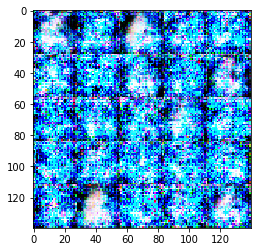

Epoch 1/1... Batch 210...Discriminator Loss: 0.5090... Generator Loss: 3.2039
Epoch 1/1... Batch 220...Discriminator Loss: 0.8116... Generator Loss: 2.0058
Epoch 1/1... Batch 230...Discriminator Loss: 0.6178... Generator Loss: 2.3894
Epoch 1/1... Batch 240...Discriminator Loss: 0.8047... Generator Loss: 4.3382
Epoch 1/1... Batch 250...Discriminator Loss: 0.8508... Generator Loss: 1.1855
Epoch 1/1... Batch 260...Discriminator Loss: 0.4920... Generator Loss: 2.6036
Epoch 1/1... Batch 270...Discriminator Loss: 0.4568... Generator Loss: 3.5788
Epoch 1/1... Batch 280...Discriminator Loss: 0.7134... Generator Loss: 2.0966
Epoch 1/1... Batch 290...Discriminator Loss: 0.4892... Generator Loss: 3.5437
Epoch 1/1... Batch 300...Discriminator Loss: 1.1521... Generator Loss: 1.5022


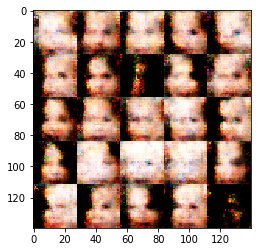

Epoch 1/1... Batch 310...Discriminator Loss: 0.6880... Generator Loss: 1.6939
Epoch 1/1... Batch 320...Discriminator Loss: 1.4589... Generator Loss: 0.6914
Epoch 1/1... Batch 330...Discriminator Loss: 0.5927... Generator Loss: 2.8608
Epoch 1/1... Batch 340...Discriminator Loss: 0.7759... Generator Loss: 3.0923
Epoch 1/1... Batch 350...Discriminator Loss: 1.9137... Generator Loss: 0.5323
Epoch 1/1... Batch 360...Discriminator Loss: 0.8195... Generator Loss: 2.1816
Epoch 1/1... Batch 370...Discriminator Loss: 0.8783... Generator Loss: 1.4757
Epoch 1/1... Batch 380...Discriminator Loss: 0.9914... Generator Loss: 1.2213
Epoch 1/1... Batch 390...Discriminator Loss: 1.1331... Generator Loss: 1.2203
Epoch 1/1... Batch 400...Discriminator Loss: 1.1002... Generator Loss: 0.9422


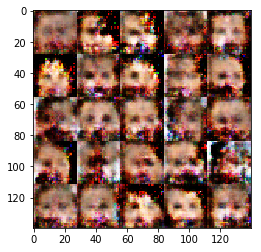

Epoch 1/1... Batch 410...Discriminator Loss: 0.7452... Generator Loss: 1.4240
Epoch 1/1... Batch 420...Discriminator Loss: 0.9553... Generator Loss: 1.1753
Epoch 1/1... Batch 430...Discriminator Loss: 0.8041... Generator Loss: 1.5165
Epoch 1/1... Batch 440...Discriminator Loss: 0.8663... Generator Loss: 1.7155
Epoch 1/1... Batch 450...Discriminator Loss: 0.9284... Generator Loss: 1.4585
Epoch 1/1... Batch 460...Discriminator Loss: 1.0463... Generator Loss: 1.1729
Epoch 1/1... Batch 470...Discriminator Loss: 1.1055... Generator Loss: 0.9520
Epoch 1/1... Batch 480...Discriminator Loss: 1.0451... Generator Loss: 1.2139
Epoch 1/1... Batch 490...Discriminator Loss: 1.2375... Generator Loss: 0.6799
Epoch 1/1... Batch 500...Discriminator Loss: 0.8274... Generator Loss: 1.7238


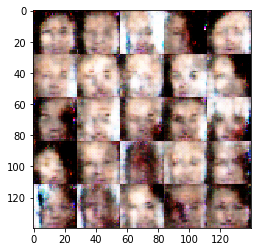

Epoch 1/1... Batch 510...Discriminator Loss: 1.2361... Generator Loss: 3.1114
Epoch 1/1... Batch 520...Discriminator Loss: 0.9683... Generator Loss: 2.7607
Epoch 1/1... Batch 530...Discriminator Loss: 1.1417... Generator Loss: 1.1420
Epoch 1/1... Batch 540...Discriminator Loss: 0.9574... Generator Loss: 1.9085
Epoch 1/1... Batch 550...Discriminator Loss: 0.8367... Generator Loss: 1.9432
Epoch 1/1... Batch 560...Discriminator Loss: 1.3707... Generator Loss: 2.9228
Epoch 1/1... Batch 570...Discriminator Loss: 0.7679... Generator Loss: 1.3570
Epoch 1/1... Batch 580...Discriminator Loss: 0.8807... Generator Loss: 1.4309
Epoch 1/1... Batch 590...Discriminator Loss: 0.9300... Generator Loss: 1.1653
Epoch 1/1... Batch 600...Discriminator Loss: 0.7696... Generator Loss: 1.4463


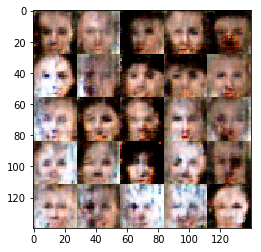

Epoch 1/1... Batch 610...Discriminator Loss: 1.1188... Generator Loss: 1.5127
Epoch 1/1... Batch 620...Discriminator Loss: 0.9183... Generator Loss: 1.0823
Epoch 1/1... Batch 630...Discriminator Loss: 0.9940... Generator Loss: 1.3291
Epoch 1/1... Batch 640...Discriminator Loss: 0.9299... Generator Loss: 1.6337
Epoch 1/1... Batch 650...Discriminator Loss: 1.1061... Generator Loss: 0.7880
Epoch 1/1... Batch 660...Discriminator Loss: 1.2251... Generator Loss: 0.9418
Epoch 1/1... Batch 670...Discriminator Loss: 0.7836... Generator Loss: 2.5761
Epoch 1/1... Batch 680...Discriminator Loss: 0.6566... Generator Loss: 2.0962
Epoch 1/1... Batch 690...Discriminator Loss: 0.9041... Generator Loss: 1.5721
Epoch 1/1... Batch 700...Discriminator Loss: 0.8007... Generator Loss: 2.3110


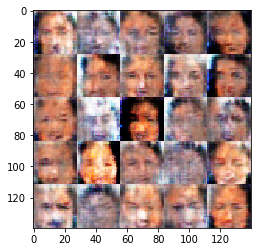

Epoch 1/1... Batch 710...Discriminator Loss: 0.9155... Generator Loss: 1.3164
Epoch 1/1... Batch 720...Discriminator Loss: 0.9511... Generator Loss: 1.5017
Epoch 1/1... Batch 730...Discriminator Loss: 0.7875... Generator Loss: 1.9333
Epoch 1/1... Batch 740...Discriminator Loss: 0.9594... Generator Loss: 2.2370
Epoch 1/1... Batch 750...Discriminator Loss: 1.2207... Generator Loss: 1.0917
Epoch 1/1... Batch 760...Discriminator Loss: 1.3400... Generator Loss: 0.6286
Epoch 1/1... Batch 770...Discriminator Loss: 1.0196... Generator Loss: 1.5467
Epoch 1/1... Batch 780...Discriminator Loss: 0.8491... Generator Loss: 1.0790
Epoch 1/1... Batch 790...Discriminator Loss: 0.8131... Generator Loss: 1.5521
Epoch 1/1... Batch 800...Discriminator Loss: 1.5311... Generator Loss: 1.0187


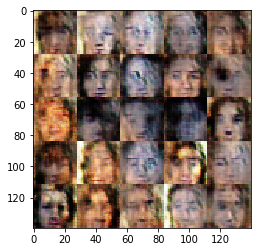

Epoch 1/1... Batch 810...Discriminator Loss: 0.8870... Generator Loss: 2.0937
Epoch 1/1... Batch 820...Discriminator Loss: 0.6307... Generator Loss: 3.0748
Epoch 1/1... Batch 830...Discriminator Loss: 1.0102... Generator Loss: 1.5948
Epoch 1/1... Batch 840...Discriminator Loss: 0.9312... Generator Loss: 1.3522
Epoch 1/1... Batch 850...Discriminator Loss: 1.0391... Generator Loss: 1.3648
Epoch 1/1... Batch 860...Discriminator Loss: 1.0527... Generator Loss: 1.2491
Epoch 1/1... Batch 870...Discriminator Loss: 0.9117... Generator Loss: 1.5296
Epoch 1/1... Batch 880...Discriminator Loss: 0.7206... Generator Loss: 1.8024
Epoch 1/1... Batch 890...Discriminator Loss: 0.8573... Generator Loss: 1.5775
Epoch 1/1... Batch 900...Discriminator Loss: 1.0210... Generator Loss: 1.1280


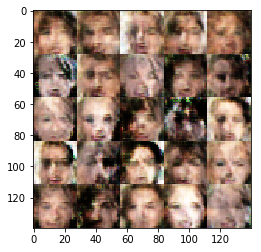

Epoch 1/1... Batch 910...Discriminator Loss: 0.7705... Generator Loss: 1.5714
Epoch 1/1... Batch 920...Discriminator Loss: 0.9996... Generator Loss: 1.4948
Epoch 1/1... Batch 930...Discriminator Loss: 1.0733... Generator Loss: 0.9599
Epoch 1/1... Batch 940...Discriminator Loss: 0.8587... Generator Loss: 1.6022
Epoch 1/1... Batch 950...Discriminator Loss: 1.0880... Generator Loss: 1.8172
Epoch 1/1... Batch 960...Discriminator Loss: 0.8491... Generator Loss: 1.5071
Epoch 1/1... Batch 970...Discriminator Loss: 0.7659... Generator Loss: 1.8661
Epoch 1/1... Batch 980...Discriminator Loss: 0.9434... Generator Loss: 1.1360
Epoch 1/1... Batch 990...Discriminator Loss: 1.1270... Generator Loss: 3.3043
Epoch 1/1... Batch 1000...Discriminator Loss: 0.7244... Generator Loss: 1.6638


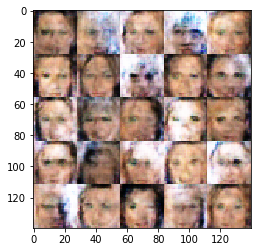

Epoch 1/1... Batch 1010...Discriminator Loss: 1.1279... Generator Loss: 1.1924
Epoch 1/1... Batch 1020...Discriminator Loss: 0.8328... Generator Loss: 1.5772
Epoch 1/1... Batch 1030...Discriminator Loss: 0.7670... Generator Loss: 1.4138
Epoch 1/1... Batch 1040...Discriminator Loss: 1.0441... Generator Loss: 0.9436
Epoch 1/1... Batch 1050...Discriminator Loss: 0.7319... Generator Loss: 2.6158
Epoch 1/1... Batch 1060...Discriminator Loss: 1.3888... Generator Loss: 3.6741
Epoch 1/1... Batch 1070...Discriminator Loss: 0.8690... Generator Loss: 1.8561
Epoch 1/1... Batch 1080...Discriminator Loss: 1.1675... Generator Loss: 1.1326
Epoch 1/1... Batch 1090...Discriminator Loss: 0.9646... Generator Loss: 1.5654
Epoch 1/1... Batch 1100...Discriminator Loss: 1.2045... Generator Loss: 1.4346


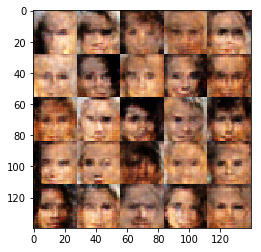

Epoch 1/1... Batch 1110...Discriminator Loss: 1.2757... Generator Loss: 3.1881
Epoch 1/1... Batch 1120...Discriminator Loss: 0.9577... Generator Loss: 1.7132
Epoch 1/1... Batch 1130...Discriminator Loss: 0.8641... Generator Loss: 1.6454
Epoch 1/1... Batch 1140...Discriminator Loss: 0.7858... Generator Loss: 2.5516
Epoch 1/1... Batch 1150...Discriminator Loss: 0.9554... Generator Loss: 2.0806
Epoch 1/1... Batch 1160...Discriminator Loss: 0.9114... Generator Loss: 1.7771
Epoch 1/1... Batch 1170...Discriminator Loss: 0.8764... Generator Loss: 2.5397
Epoch 1/1... Batch 1180...Discriminator Loss: 1.8486... Generator Loss: 3.9126
Epoch 1/1... Batch 1190...Discriminator Loss: 0.8567... Generator Loss: 1.1400
Epoch 1/1... Batch 1200...Discriminator Loss: 1.0901... Generator Loss: 1.6273


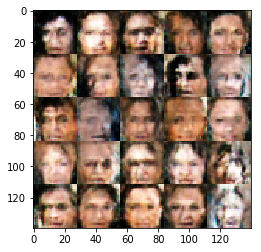

Epoch 1/1... Batch 1210...Discriminator Loss: 1.0585... Generator Loss: 0.9695
Epoch 1/1... Batch 1220...Discriminator Loss: 0.7011... Generator Loss: 1.7140
Epoch 1/1... Batch 1230...Discriminator Loss: 1.0781... Generator Loss: 1.2507
Epoch 1/1... Batch 1240...Discriminator Loss: 0.7821... Generator Loss: 1.8488
Epoch 1/1... Batch 1250...Discriminator Loss: 0.8551... Generator Loss: 1.4339
Epoch 1/1... Batch 1260...Discriminator Loss: 0.8141... Generator Loss: 1.9906
Epoch 1/1... Batch 1270...Discriminator Loss: 0.8956... Generator Loss: 1.8030
Epoch 1/1... Batch 1280...Discriminator Loss: 0.7929... Generator Loss: 1.9411
Epoch 1/1... Batch 1290...Discriminator Loss: 0.8953... Generator Loss: 1.3477
Epoch 1/1... Batch 1300...Discriminator Loss: 0.8953... Generator Loss: 2.0522


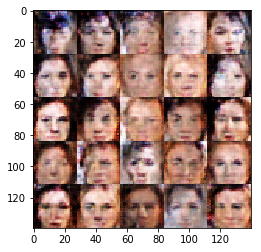

Epoch 1/1... Batch 1310...Discriminator Loss: 0.9287... Generator Loss: 1.1030
Epoch 1/1... Batch 1320...Discriminator Loss: 1.1066... Generator Loss: 1.0036
Epoch 1/1... Batch 1330...Discriminator Loss: 0.8900... Generator Loss: 2.2371
Epoch 1/1... Batch 1340...Discriminator Loss: 1.1936... Generator Loss: 0.9347
Epoch 1/1... Batch 1350...Discriminator Loss: 0.7887... Generator Loss: 1.5368
Epoch 1/1... Batch 1360...Discriminator Loss: 1.1462... Generator Loss: 1.2352
Epoch 1/1... Batch 1370...Discriminator Loss: 0.8853... Generator Loss: 1.7988
Epoch 1/1... Batch 1380...Discriminator Loss: 0.7811... Generator Loss: 2.6515
Epoch 1/1... Batch 1390...Discriminator Loss: 1.0299... Generator Loss: 2.2504
Epoch 1/1... Batch 1400...Discriminator Loss: 0.7911... Generator Loss: 1.5720


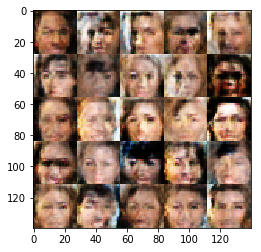

Epoch 1/1... Batch 1410...Discriminator Loss: 0.8659... Generator Loss: 1.7269
Epoch 1/1... Batch 1420...Discriminator Loss: 0.6970... Generator Loss: 2.0554
Epoch 1/1... Batch 1430...Discriminator Loss: 1.2110... Generator Loss: 0.7387
Epoch 1/1... Batch 1440...Discriminator Loss: 1.0448... Generator Loss: 2.7322
Epoch 1/1... Batch 1450...Discriminator Loss: 0.9404... Generator Loss: 2.2567
Epoch 1/1... Batch 1460...Discriminator Loss: 0.9463... Generator Loss: 1.7310
Epoch 1/1... Batch 1470...Discriminator Loss: 0.8276... Generator Loss: 1.6857
Epoch 1/1... Batch 1480...Discriminator Loss: 1.0695... Generator Loss: 3.1174
Epoch 1/1... Batch 1490...Discriminator Loss: 0.8021... Generator Loss: 1.1818
Epoch 1/1... Batch 1500...Discriminator Loss: 1.0629... Generator Loss: 2.1249


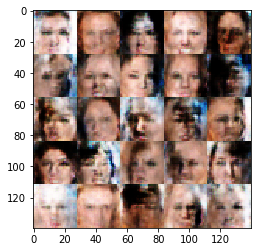

Epoch 1/1... Batch 1510...Discriminator Loss: 0.9374... Generator Loss: 1.6109
Epoch 1/1... Batch 1520...Discriminator Loss: 0.7598... Generator Loss: 2.0879
Epoch 1/1... Batch 1530...Discriminator Loss: 0.7061... Generator Loss: 1.5445
Epoch 1/1... Batch 1540...Discriminator Loss: 0.9527... Generator Loss: 1.0644
Epoch 1/1... Batch 1550...Discriminator Loss: 0.9175... Generator Loss: 1.1737
Epoch 1/1... Batch 1560...Discriminator Loss: 0.7210... Generator Loss: 2.0153
Epoch 1/1... Batch 1570...Discriminator Loss: 0.6994... Generator Loss: 1.3588
Epoch 1/1... Batch 1580...Discriminator Loss: 1.1469... Generator Loss: 3.8620
Epoch 1/1... Batch 1590...Discriminator Loss: 0.9051... Generator Loss: 1.3448
Epoch 1/1... Batch 1600...Discriminator Loss: 0.9186... Generator Loss: 2.2269


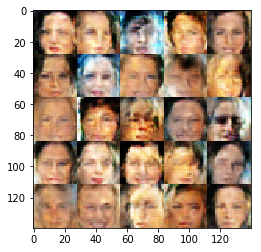

Epoch 1/1... Batch 1610...Discriminator Loss: 0.7613... Generator Loss: 2.1906
Epoch 1/1... Batch 1620...Discriminator Loss: 0.7004... Generator Loss: 1.7222
Epoch 1/1... Batch 1630...Discriminator Loss: 0.8728... Generator Loss: 1.6001
Epoch 1/1... Batch 1640...Discriminator Loss: 0.8393... Generator Loss: 1.6499
Epoch 1/1... Batch 1650...Discriminator Loss: 0.8846... Generator Loss: 1.9609
Epoch 1/1... Batch 1660...Discriminator Loss: 0.7507... Generator Loss: 2.1612
Epoch 1/1... Batch 1670...Discriminator Loss: 0.8479... Generator Loss: 2.0620
Epoch 1/1... Batch 1680...Discriminator Loss: 0.8561... Generator Loss: 3.1150
Epoch 1/1... Batch 1690...Discriminator Loss: 0.9000... Generator Loss: 1.9911
Epoch 1/1... Batch 1700...Discriminator Loss: 0.8564... Generator Loss: 2.0619


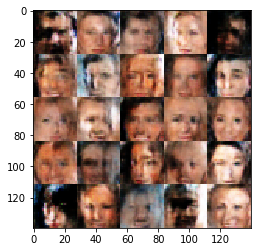

Epoch 1/1... Batch 1710...Discriminator Loss: 0.8841... Generator Loss: 2.9558
Epoch 1/1... Batch 1720...Discriminator Loss: 0.9650... Generator Loss: 1.3012
Epoch 1/1... Batch 1730...Discriminator Loss: 0.8287... Generator Loss: 1.6186
Epoch 1/1... Batch 1740...Discriminator Loss: 1.0050... Generator Loss: 1.1525
Epoch 1/1... Batch 1750...Discriminator Loss: 0.7701... Generator Loss: 1.9140
Epoch 1/1... Batch 1760...Discriminator Loss: 0.6981... Generator Loss: 2.2748
Epoch 1/1... Batch 1770...Discriminator Loss: 0.8993... Generator Loss: 2.8539
Epoch 1/1... Batch 1780...Discriminator Loss: 0.8573... Generator Loss: 1.8189
Epoch 1/1... Batch 1790...Discriminator Loss: 0.9370... Generator Loss: 2.2679
Epoch 1/1... Batch 1800...Discriminator Loss: 0.7988... Generator Loss: 2.1247


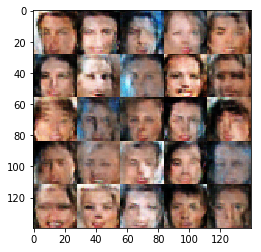

Epoch 1/1... Batch 1810...Discriminator Loss: 0.8820... Generator Loss: 2.6571
Epoch 1/1... Batch 1820...Discriminator Loss: 0.9482... Generator Loss: 1.6584
Epoch 1/1... Batch 1830...Discriminator Loss: 0.7070... Generator Loss: 1.4852
Epoch 1/1... Batch 1840...Discriminator Loss: 0.7783... Generator Loss: 1.7573
Epoch 1/1... Batch 1850...Discriminator Loss: 0.7308... Generator Loss: 1.5776
Epoch 1/1... Batch 1860...Discriminator Loss: 0.8004... Generator Loss: 1.4192
Epoch 1/1... Batch 1870...Discriminator Loss: 0.7996... Generator Loss: 1.1823
Epoch 1/1... Batch 1880...Discriminator Loss: 0.7291... Generator Loss: 2.0237
Epoch 1/1... Batch 1890...Discriminator Loss: 0.8503... Generator Loss: 1.5687
Epoch 1/1... Batch 1900...Discriminator Loss: 0.8995... Generator Loss: 1.2771


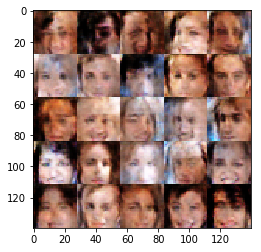

Epoch 1/1... Batch 1910...Discriminator Loss: 0.7439... Generator Loss: 2.4508
Epoch 1/1... Batch 1920...Discriminator Loss: 1.0570... Generator Loss: 1.2458
Epoch 1/1... Batch 1930...Discriminator Loss: 0.7019... Generator Loss: 2.5148
Epoch 1/1... Batch 1940...Discriminator Loss: 0.8097... Generator Loss: 1.5629
Epoch 1/1... Batch 1950...Discriminator Loss: 0.7789... Generator Loss: 2.4213
Epoch 1/1... Batch 1960...Discriminator Loss: 0.6962... Generator Loss: 1.8056
Epoch 1/1... Batch 1970...Discriminator Loss: 0.8671... Generator Loss: 1.2985
Epoch 1/1... Batch 1980...Discriminator Loss: 1.6057... Generator Loss: 3.6156
Epoch 1/1... Batch 1990...Discriminator Loss: 0.9157... Generator Loss: 1.7670
Epoch 1/1... Batch 2000...Discriminator Loss: 0.8999... Generator Loss: 1.3373


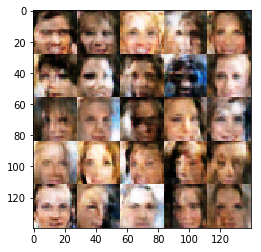

Epoch 1/1... Batch 2010...Discriminator Loss: 0.8075... Generator Loss: 2.8632
Epoch 1/1... Batch 2020...Discriminator Loss: 0.8505... Generator Loss: 1.2460
Epoch 1/1... Batch 2030...Discriminator Loss: 0.6600... Generator Loss: 2.1772
Epoch 1/1... Batch 2040...Discriminator Loss: 0.6007... Generator Loss: 1.9851
Epoch 1/1... Batch 2050...Discriminator Loss: 0.8104... Generator Loss: 2.4853
Epoch 1/1... Batch 2060...Discriminator Loss: 0.6728... Generator Loss: 2.1352
Epoch 1/1... Batch 2070...Discriminator Loss: 1.3509... Generator Loss: 0.8292
Epoch 1/1... Batch 2080...Discriminator Loss: 0.8959... Generator Loss: 1.3149
Epoch 1/1... Batch 2090...Discriminator Loss: 1.0661... Generator Loss: 1.1299
Epoch 1/1... Batch 2100...Discriminator Loss: 0.8086... Generator Loss: 3.2553


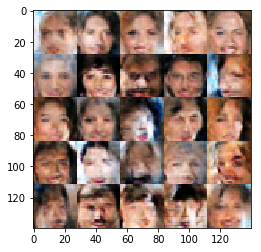

Epoch 1/1... Batch 2110...Discriminator Loss: 0.7719... Generator Loss: 1.9476
Epoch 1/1... Batch 2120...Discriminator Loss: 0.8964... Generator Loss: 1.4466
Epoch 1/1... Batch 2130...Discriminator Loss: 1.1422... Generator Loss: 0.6534
Epoch 1/1... Batch 2140...Discriminator Loss: 0.7318... Generator Loss: 1.5036
Epoch 1/1... Batch 2150...Discriminator Loss: 0.6972... Generator Loss: 2.1110
Epoch 1/1... Batch 2160...Discriminator Loss: 0.8617... Generator Loss: 1.5384
Epoch 1/1... Batch 2170...Discriminator Loss: 0.6763... Generator Loss: 2.0738
Epoch 1/1... Batch 2180...Discriminator Loss: 1.5198... Generator Loss: 0.7633
Epoch 1/1... Batch 2190...Discriminator Loss: 0.9138... Generator Loss: 1.6820
Epoch 1/1... Batch 2200...Discriminator Loss: 0.8310... Generator Loss: 1.8409


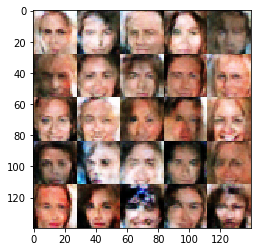

Epoch 1/1... Batch 2210...Discriminator Loss: 0.6944... Generator Loss: 2.6594
Epoch 1/1... Batch 2220...Discriminator Loss: 0.8268... Generator Loss: 1.6520
Epoch 1/1... Batch 2230...Discriminator Loss: 0.6390... Generator Loss: 2.2428
Epoch 1/1... Batch 2240...Discriminator Loss: 0.8238... Generator Loss: 2.3118
Epoch 1/1... Batch 2250...Discriminator Loss: 1.3704... Generator Loss: 0.8301
Epoch 1/1... Batch 2260...Discriminator Loss: 0.8547... Generator Loss: 1.9031
Epoch 1/1... Batch 2270...Discriminator Loss: 0.6535... Generator Loss: 2.1378
Epoch 1/1... Batch 2280...Discriminator Loss: 0.7515... Generator Loss: 2.7664
Epoch 1/1... Batch 2290...Discriminator Loss: 0.6448... Generator Loss: 1.9471
Epoch 1/1... Batch 2300...Discriminator Loss: 1.0191... Generator Loss: 1.0123


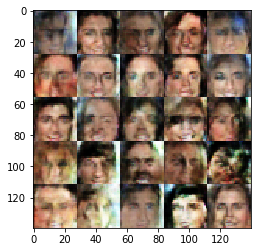

Epoch 1/1... Batch 2310...Discriminator Loss: 1.0231... Generator Loss: 2.2993
Epoch 1/1... Batch 2320...Discriminator Loss: 0.8649... Generator Loss: 1.3943
Epoch 1/1... Batch 2330...Discriminator Loss: 0.8289... Generator Loss: 1.5949
Epoch 1/1... Batch 2340...Discriminator Loss: 0.8650... Generator Loss: 1.8437
Epoch 1/1... Batch 2350...Discriminator Loss: 0.6450... Generator Loss: 2.4373
Epoch 1/1... Batch 2360...Discriminator Loss: 0.6505... Generator Loss: 3.0541
Epoch 1/1... Batch 2370...Discriminator Loss: 0.7113... Generator Loss: 1.8421
Epoch 1/1... Batch 2380...Discriminator Loss: 1.3293... Generator Loss: 2.8941
Epoch 1/1... Batch 2390...Discriminator Loss: 0.7402... Generator Loss: 2.1520
Epoch 1/1... Batch 2400...Discriminator Loss: 0.7694... Generator Loss: 2.8745


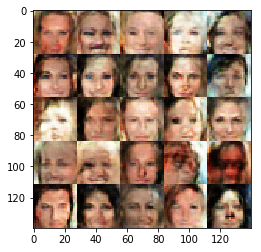

Epoch 1/1... Batch 2410...Discriminator Loss: 0.8534... Generator Loss: 2.2656
Epoch 1/1... Batch 2420...Discriminator Loss: 0.6131... Generator Loss: 2.3362
Epoch 1/1... Batch 2430...Discriminator Loss: 0.7527... Generator Loss: 1.7409
Epoch 1/1... Batch 2440...Discriminator Loss: 0.7922... Generator Loss: 2.4393
Epoch 1/1... Batch 2450...Discriminator Loss: 0.7723... Generator Loss: 2.0979
Epoch 1/1... Batch 2460...Discriminator Loss: 0.6460... Generator Loss: 2.8695
Epoch 1/1... Batch 2470...Discriminator Loss: 0.8849... Generator Loss: 1.8100
Epoch 1/1... Batch 2480...Discriminator Loss: 0.7352... Generator Loss: 1.9735
Epoch 1/1... Batch 2490...Discriminator Loss: 0.8642... Generator Loss: 1.5913
Epoch 1/1... Batch 2500...Discriminator Loss: 0.9805... Generator Loss: 2.7510


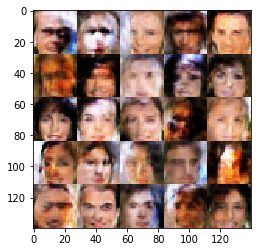

Epoch 1/1... Batch 2510...Discriminator Loss: 0.6743... Generator Loss: 2.0535
Epoch 1/1... Batch 2520...Discriminator Loss: 0.7675... Generator Loss: 1.8168
Epoch 1/1... Batch 2530...Discriminator Loss: 1.0294... Generator Loss: 0.8881
Epoch 1/1... Batch 2540...Discriminator Loss: 0.7216... Generator Loss: 1.5392
Epoch 1/1... Batch 2550...Discriminator Loss: 0.6894... Generator Loss: 1.3619
Epoch 1/1... Batch 2560...Discriminator Loss: 0.8079... Generator Loss: 1.8992
Epoch 1/1... Batch 2570...Discriminator Loss: 0.8510... Generator Loss: 1.5233
Epoch 1/1... Batch 2580...Discriminator Loss: 0.7840... Generator Loss: 1.9318
Epoch 1/1... Batch 2590...Discriminator Loss: 0.6496... Generator Loss: 2.1896
Epoch 1/1... Batch 2600...Discriminator Loss: 0.9641... Generator Loss: 3.1723


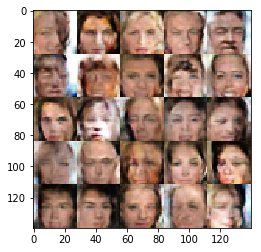

Epoch 1/1... Batch 2610...Discriminator Loss: 1.0990... Generator Loss: 1.1183
Epoch 1/1... Batch 2620...Discriminator Loss: 1.2575... Generator Loss: 1.1204
Epoch 1/1... Batch 2630...Discriminator Loss: 0.7510... Generator Loss: 2.0913
Epoch 1/1... Batch 2640...Discriminator Loss: 0.8744... Generator Loss: 2.2475
Epoch 1/1... Batch 2650...Discriminator Loss: 0.8754... Generator Loss: 1.8460
Epoch 1/1... Batch 2660...Discriminator Loss: 0.7794... Generator Loss: 2.0803
Epoch 1/1... Batch 2670...Discriminator Loss: 0.7984... Generator Loss: 1.7110
Epoch 1/1... Batch 2680...Discriminator Loss: 0.6984... Generator Loss: 2.4470
Epoch 1/1... Batch 2690...Discriminator Loss: 1.1107... Generator Loss: 1.1295
Epoch 1/1... Batch 2700...Discriminator Loss: 1.5926... Generator Loss: 0.6251


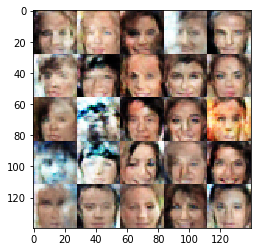

Epoch 1/1... Batch 2710...Discriminator Loss: 0.6324... Generator Loss: 1.9619
Epoch 1/1... Batch 2720...Discriminator Loss: 0.7602... Generator Loss: 2.2748
Epoch 1/1... Batch 2730...Discriminator Loss: 0.6567... Generator Loss: 2.9647
Epoch 1/1... Batch 2740...Discriminator Loss: 0.8662... Generator Loss: 1.5271
Epoch 1/1... Batch 2750...Discriminator Loss: 0.5993... Generator Loss: 2.6351
Epoch 1/1... Batch 2760...Discriminator Loss: 0.8123... Generator Loss: 1.3641
Epoch 1/1... Batch 2770...Discriminator Loss: 0.6527... Generator Loss: 2.5262
Epoch 1/1... Batch 2780...Discriminator Loss: 0.6903... Generator Loss: 1.8936
Epoch 1/1... Batch 2790...Discriminator Loss: 0.7452... Generator Loss: 2.1867
Epoch 1/1... Batch 2800...Discriminator Loss: 0.7357... Generator Loss: 1.7963


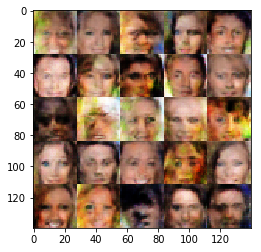

Epoch 1/1... Batch 2810...Discriminator Loss: 0.8074... Generator Loss: 1.6015
Epoch 1/1... Batch 2820...Discriminator Loss: 0.6639... Generator Loss: 2.3773
Epoch 1/1... Batch 2830...Discriminator Loss: 0.8045... Generator Loss: 1.7204
Epoch 1/1... Batch 2840...Discriminator Loss: 0.6959... Generator Loss: 1.8393
Epoch 1/1... Batch 2850...Discriminator Loss: 0.8055... Generator Loss: 1.8564
Epoch 1/1... Batch 2860...Discriminator Loss: 0.8366... Generator Loss: 2.9939
Epoch 1/1... Batch 2870...Discriminator Loss: 0.8387... Generator Loss: 2.0845
Epoch 1/1... Batch 2880...Discriminator Loss: 0.7103... Generator Loss: 2.2918
Epoch 1/1... Batch 2890...Discriminator Loss: 0.7231... Generator Loss: 1.8641
Epoch 1/1... Batch 2900...Discriminator Loss: 0.8154... Generator Loss: 1.6183


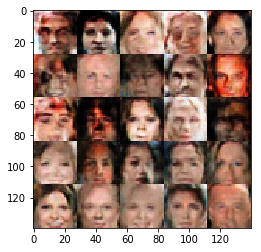

Epoch 1/1... Batch 2910...Discriminator Loss: 0.8688... Generator Loss: 2.3800
Epoch 1/1... Batch 2920...Discriminator Loss: 0.6982... Generator Loss: 2.7209
Epoch 1/1... Batch 2930...Discriminator Loss: 0.7462... Generator Loss: 2.6670
Epoch 1/1... Batch 2940...Discriminator Loss: 1.2810... Generator Loss: 4.4744
Epoch 1/1... Batch 2950...Discriminator Loss: 0.7263... Generator Loss: 2.5784
Epoch 1/1... Batch 2960...Discriminator Loss: 0.7247... Generator Loss: 2.4555
Epoch 1/1... Batch 2970...Discriminator Loss: 0.6459... Generator Loss: 2.5906
Epoch 1/1... Batch 2980...Discriminator Loss: 0.6035... Generator Loss: 2.3498
Epoch 1/1... Batch 2990...Discriminator Loss: 0.8461... Generator Loss: 1.2579
Epoch 1/1... Batch 3000...Discriminator Loss: 0.8572... Generator Loss: 1.1011


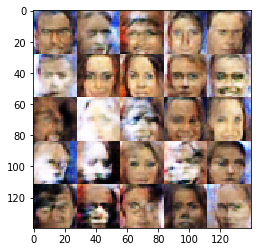

Epoch 1/1... Batch 3010...Discriminator Loss: 0.7792... Generator Loss: 2.2351
Epoch 1/1... Batch 3020...Discriminator Loss: 0.8344... Generator Loss: 2.1471
Epoch 1/1... Batch 3030...Discriminator Loss: 1.7079... Generator Loss: 0.8811
Epoch 1/1... Batch 3040...Discriminator Loss: 0.7731... Generator Loss: 2.6579
Epoch 1/1... Batch 3050...Discriminator Loss: 0.8228... Generator Loss: 2.0987
Epoch 1/1... Batch 3060...Discriminator Loss: 0.6051... Generator Loss: 2.2014
Epoch 1/1... Batch 3070...Discriminator Loss: 0.6359... Generator Loss: 1.3298
Epoch 1/1... Batch 3080...Discriminator Loss: 0.8247... Generator Loss: 1.9868
Epoch 1/1... Batch 3090...Discriminator Loss: 0.6931... Generator Loss: 2.7447
Epoch 1/1... Batch 3100...Discriminator Loss: 0.8975... Generator Loss: 1.7711


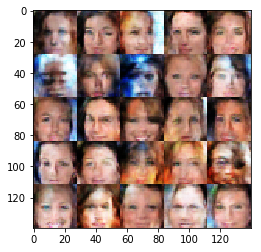

Epoch 1/1... Batch 3110...Discriminator Loss: 0.7693... Generator Loss: 2.4758
Epoch 1/1... Batch 3120...Discriminator Loss: 0.8073... Generator Loss: 1.5540
Epoch 1/1... Batch 3130...Discriminator Loss: 0.8558... Generator Loss: 1.6152
Epoch 1/1... Batch 3140...Discriminator Loss: 0.7003... Generator Loss: 1.9769
Epoch 1/1... Batch 3150...Discriminator Loss: 0.6506... Generator Loss: 2.7901
Epoch 1/1... Batch 3160...Discriminator Loss: 0.6844... Generator Loss: 1.7635
Epoch 1/1... Batch 3170...Discriminator Loss: 0.6130... Generator Loss: 2.2962
Epoch 1/1... Batch 3180...Discriminator Loss: 0.7605... Generator Loss: 1.5145
Epoch 1/1... Batch 3190...Discriminator Loss: 0.5903... Generator Loss: 2.0948
Epoch 1/1... Batch 3200...Discriminator Loss: 0.6207... Generator Loss: 2.7913


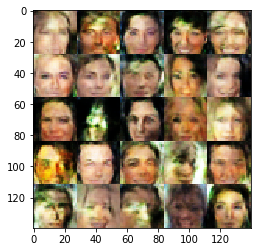

Epoch 1/1... Batch 3210...Discriminator Loss: 0.8072... Generator Loss: 1.3144
Epoch 1/1... Batch 3220...Discriminator Loss: 0.5929... Generator Loss: 2.7829
Epoch 1/1... Batch 3230...Discriminator Loss: 0.7283... Generator Loss: 2.3428
Epoch 1/1... Batch 3240...Discriminator Loss: 0.8367... Generator Loss: 1.1845
Epoch 1/1... Batch 3250...Discriminator Loss: 1.0736... Generator Loss: 3.4001
Epoch 1/1... Batch 3260...Discriminator Loss: 0.6203... Generator Loss: 2.6799
Epoch 1/1... Batch 3270...Discriminator Loss: 1.1196... Generator Loss: 0.8882
Epoch 1/1... Batch 3280...Discriminator Loss: 0.7575... Generator Loss: 3.6099
Epoch 1/1... Batch 3290...Discriminator Loss: 1.2453... Generator Loss: 0.8431
Epoch 1/1... Batch 3300...Discriminator Loss: 0.5621... Generator Loss: 2.3077


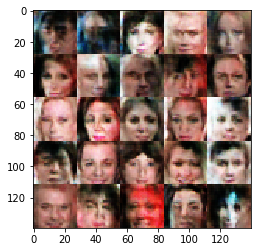

Epoch 1/1... Batch 3310...Discriminator Loss: 0.7021... Generator Loss: 2.1853
Epoch 1/1... Batch 3320...Discriminator Loss: 0.6542... Generator Loss: 2.7620
Epoch 1/1... Batch 3330...Discriminator Loss: 0.6672... Generator Loss: 2.2863
Epoch 1/1... Batch 3340...Discriminator Loss: 0.5923... Generator Loss: 2.4126
Epoch 1/1... Batch 3350...Discriminator Loss: 0.8271... Generator Loss: 1.7993
Epoch 1/1... Batch 3360...Discriminator Loss: 0.7416... Generator Loss: 3.4101
Epoch 1/1... Batch 3370...Discriminator Loss: 0.5447... Generator Loss: 3.4186
Epoch 1/1... Batch 3380...Discriminator Loss: 0.7188... Generator Loss: 2.0906
Epoch 1/1... Batch 3390...Discriminator Loss: 0.9516... Generator Loss: 0.9487
Epoch 1/1... Batch 3400...Discriminator Loss: 0.8076... Generator Loss: 2.3725


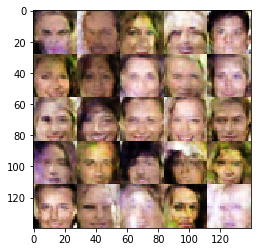

Epoch 1/1... Batch 3410...Discriminator Loss: 0.7513... Generator Loss: 2.3732
Epoch 1/1... Batch 3420...Discriminator Loss: 1.3779... Generator Loss: 0.7766
Epoch 1/1... Batch 3430...Discriminator Loss: 0.6204... Generator Loss: 1.8031
Epoch 1/1... Batch 3440...Discriminator Loss: 0.7355... Generator Loss: 3.2511
Epoch 1/1... Batch 3450...Discriminator Loss: 0.4894... Generator Loss: 2.4341
Epoch 1/1... Batch 3460...Discriminator Loss: 0.9318... Generator Loss: 3.0922
Epoch 1/1... Batch 3470...Discriminator Loss: 0.5925... Generator Loss: 2.2224
Epoch 1/1... Batch 3480...Discriminator Loss: 0.6841... Generator Loss: 3.1598
Epoch 1/1... Batch 3490...Discriminator Loss: 0.9250... Generator Loss: 1.9948
Epoch 1/1... Batch 3500...Discriminator Loss: 0.7107... Generator Loss: 2.8683


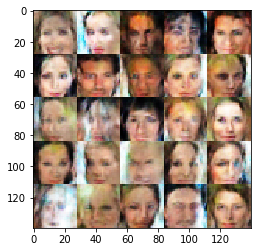

Epoch 1/1... Batch 3510...Discriminator Loss: 0.6279... Generator Loss: 2.4233
Epoch 1/1... Batch 3520...Discriminator Loss: 0.6357... Generator Loss: 2.1721
Epoch 1/1... Batch 3530...Discriminator Loss: 1.0406... Generator Loss: 1.5299
Epoch 1/1... Batch 3540...Discriminator Loss: 0.6325... Generator Loss: 2.0432
Epoch 1/1... Batch 3550...Discriminator Loss: 0.7855... Generator Loss: 1.6336
Epoch 1/1... Batch 3560...Discriminator Loss: 0.6839... Generator Loss: 2.3821
Epoch 1/1... Batch 3570...Discriminator Loss: 0.9172... Generator Loss: 3.4472
Epoch 1/1... Batch 3580...Discriminator Loss: 0.9721... Generator Loss: 1.0674
Epoch 1/1... Batch 3590...Discriminator Loss: 0.6321... Generator Loss: 3.5806
Epoch 1/1... Batch 3600...Discriminator Loss: 0.6902... Generator Loss: 1.5709


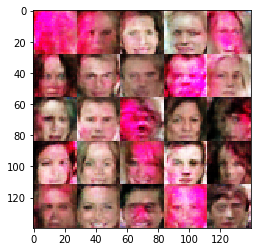

Epoch 1/1... Batch 3610...Discriminator Loss: 0.6317... Generator Loss: 1.7161
Epoch 1/1... Batch 3620...Discriminator Loss: 0.5510... Generator Loss: 3.1486
Epoch 1/1... Batch 3630...Discriminator Loss: 0.6692... Generator Loss: 2.2784
Epoch 1/1... Batch 3640...Discriminator Loss: 0.7281... Generator Loss: 2.3125
Epoch 1/1... Batch 3650...Discriminator Loss: 0.7307... Generator Loss: 2.3981
Epoch 1/1... Batch 3660...Discriminator Loss: 0.8585... Generator Loss: 1.1662
Epoch 1/1... Batch 3670...Discriminator Loss: 0.6347... Generator Loss: 3.2358
Epoch 1/1... Batch 3680...Discriminator Loss: 0.9083... Generator Loss: 1.5935
Epoch 1/1... Batch 3690...Discriminator Loss: 0.7923... Generator Loss: 3.4305
Epoch 1/1... Batch 3700...Discriminator Loss: 0.7131... Generator Loss: 2.7105


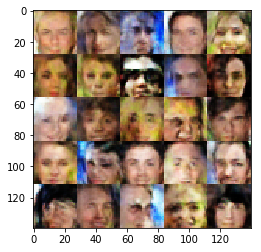

Epoch 1/1... Batch 3710...Discriminator Loss: 0.9502... Generator Loss: 1.8234
Epoch 1/1... Batch 3720...Discriminator Loss: 0.7725... Generator Loss: 1.8849
Epoch 1/1... Batch 3730...Discriminator Loss: 0.5371... Generator Loss: 2.6724
Epoch 1/1... Batch 3740...Discriminator Loss: 0.6891... Generator Loss: 2.1840
Epoch 1/1... Batch 3750...Discriminator Loss: 0.7290... Generator Loss: 2.1645
Epoch 1/1... Batch 3760...Discriminator Loss: 0.6490... Generator Loss: 3.0100
Epoch 1/1... Batch 3770...Discriminator Loss: 0.6409... Generator Loss: 2.4097
Epoch 1/1... Batch 3780...Discriminator Loss: 0.5156... Generator Loss: 2.3565
Epoch 1/1... Batch 3790...Discriminator Loss: 0.6622... Generator Loss: 3.8907
Epoch 1/1... Batch 3800...Discriminator Loss: 0.7125... Generator Loss: 1.5977


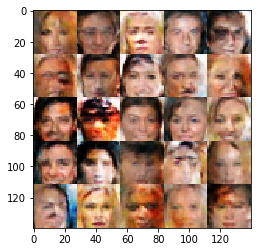

Epoch 1/1... Batch 3810...Discriminator Loss: 0.8907... Generator Loss: 4.1135
Epoch 1/1... Batch 3820...Discriminator Loss: 0.8565... Generator Loss: 3.2207
Epoch 1/1... Batch 3830...Discriminator Loss: 0.6138... Generator Loss: 2.5593
Epoch 1/1... Batch 3840...Discriminator Loss: 1.0153... Generator Loss: 3.5552
Epoch 1/1... Batch 3850...Discriminator Loss: 0.8954... Generator Loss: 2.4279
Epoch 1/1... Batch 3860...Discriminator Loss: 0.7719... Generator Loss: 2.3486
Epoch 1/1... Batch 3870...Discriminator Loss: 0.6354... Generator Loss: 2.1594
Epoch 1/1... Batch 3880...Discriminator Loss: 0.7101... Generator Loss: 3.4695
Epoch 1/1... Batch 3890...Discriminator Loss: 0.7355... Generator Loss: 2.0903
Epoch 1/1... Batch 3900...Discriminator Loss: 0.6414... Generator Loss: 2.8427


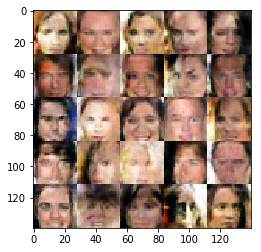

Epoch 1/1... Batch 3910...Discriminator Loss: 0.6524... Generator Loss: 2.2895
Epoch 1/1... Batch 3920...Discriminator Loss: 0.7579... Generator Loss: 2.4395
Epoch 1/1... Batch 3930...Discriminator Loss: 0.8297... Generator Loss: 1.4360
Epoch 1/1... Batch 3940...Discriminator Loss: 0.7708... Generator Loss: 2.6155
Epoch 1/1... Batch 3950...Discriminator Loss: 0.9380... Generator Loss: 2.7162
Epoch 1/1... Batch 3960...Discriminator Loss: 0.6988... Generator Loss: 1.6478
Epoch 1/1... Batch 3970...Discriminator Loss: 0.6913... Generator Loss: 3.0363
Epoch 1/1... Batch 3980...Discriminator Loss: 0.6917... Generator Loss: 2.3914
Epoch 1/1... Batch 3990...Discriminator Loss: 0.8106... Generator Loss: 1.5992
Epoch 1/1... Batch 4000...Discriminator Loss: 0.7580... Generator Loss: 2.2073


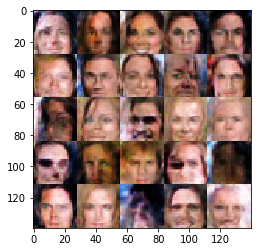

Epoch 1/1... Batch 4010...Discriminator Loss: 0.5696... Generator Loss: 1.6949
Epoch 1/1... Batch 4020...Discriminator Loss: 0.8218... Generator Loss: 1.8703
Epoch 1/1... Batch 4030...Discriminator Loss: 0.6288... Generator Loss: 2.5318
Epoch 1/1... Batch 4040...Discriminator Loss: 0.5698... Generator Loss: 2.8745
Epoch 1/1... Batch 4050...Discriminator Loss: 0.5999... Generator Loss: 2.5123
Epoch 1/1... Batch 4060...Discriminator Loss: 0.4994... Generator Loss: 2.8557
Epoch 1/1... Batch 4070...Discriminator Loss: 0.5903... Generator Loss: 2.8745
Epoch 1/1... Batch 4080...Discriminator Loss: 0.7049... Generator Loss: 2.2276
Epoch 1/1... Batch 4090...Discriminator Loss: 0.7241... Generator Loss: 2.5263
Epoch 1/1... Batch 4100...Discriminator Loss: 0.7324... Generator Loss: 2.1011


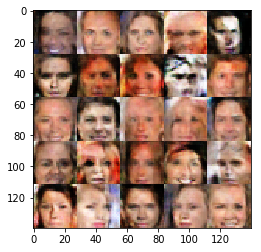

Epoch 1/1... Batch 4110...Discriminator Loss: 0.5211... Generator Loss: 2.4556
Epoch 1/1... Batch 4120...Discriminator Loss: 0.8540... Generator Loss: 3.9479
Epoch 1/1... Batch 4130...Discriminator Loss: 0.6336... Generator Loss: 2.4295
Epoch 1/1... Batch 4140...Discriminator Loss: 0.6467... Generator Loss: 3.6238
Epoch 1/1... Batch 4150...Discriminator Loss: 0.6048... Generator Loss: 2.7284
Epoch 1/1... Batch 4160...Discriminator Loss: 0.4748... Generator Loss: 4.0149
Epoch 1/1... Batch 4170...Discriminator Loss: 0.8961... Generator Loss: 1.1270
Epoch 1/1... Batch 4180...Discriminator Loss: 1.1175... Generator Loss: 1.2387
Epoch 1/1... Batch 4190...Discriminator Loss: 0.6198... Generator Loss: 2.1675
Epoch 1/1... Batch 4200...Discriminator Loss: 0.6080... Generator Loss: 2.3240


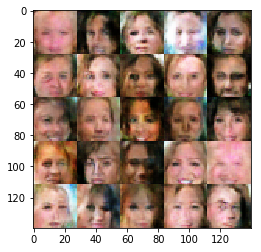

Epoch 1/1... Batch 4210...Discriminator Loss: 0.6383... Generator Loss: 2.4145
Epoch 1/1... Batch 4220...Discriminator Loss: 0.6400... Generator Loss: 2.6106
Epoch 1/1... Batch 4230...Discriminator Loss: 0.6551... Generator Loss: 3.0760
Epoch 1/1... Batch 4240...Discriminator Loss: 0.5669... Generator Loss: 2.1407
Epoch 1/1... Batch 4250...Discriminator Loss: 0.6331... Generator Loss: 2.9654
Epoch 1/1... Batch 4260...Discriminator Loss: 0.5350... Generator Loss: 2.3034
Epoch 1/1... Batch 4270...Discriminator Loss: 0.5605... Generator Loss: 3.0460
Epoch 1/1... Batch 4280...Discriminator Loss: 0.6501... Generator Loss: 1.5432
Epoch 1/1... Batch 4290...Discriminator Loss: 0.6881... Generator Loss: 2.4601
Epoch 1/1... Batch 4300...Discriminator Loss: 0.6027... Generator Loss: 2.4344


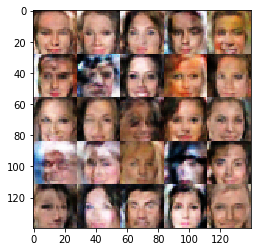

Epoch 1/1... Batch 4310...Discriminator Loss: 0.5804... Generator Loss: 2.9629
Epoch 1/1... Batch 4320...Discriminator Loss: 0.6733... Generator Loss: 3.3959
Epoch 1/1... Batch 4330...Discriminator Loss: 0.6274... Generator Loss: 2.6211
Epoch 1/1... Batch 4340...Discriminator Loss: 0.5611... Generator Loss: 3.0018
Epoch 1/1... Batch 4350...Discriminator Loss: 0.6425... Generator Loss: 2.1117
Epoch 1/1... Batch 4360...Discriminator Loss: 0.8187... Generator Loss: 3.1941
Epoch 1/1... Batch 4370...Discriminator Loss: 0.7196... Generator Loss: 3.2044
Epoch 1/1... Batch 4380...Discriminator Loss: 0.5532... Generator Loss: 2.0728
Epoch 1/1... Batch 4390...Discriminator Loss: 0.6255... Generator Loss: 2.7351
Epoch 1/1... Batch 4400...Discriminator Loss: 0.7472... Generator Loss: 2.2585


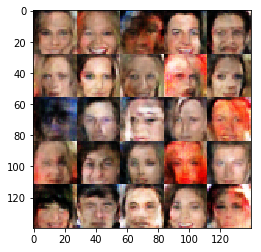

Epoch 1/1... Batch 4410...Discriminator Loss: 0.7620... Generator Loss: 2.9867
Epoch 1/1... Batch 4420...Discriminator Loss: 0.8890... Generator Loss: 1.8048
Epoch 1/1... Batch 4430...Discriminator Loss: 0.6051... Generator Loss: 3.1802
Epoch 1/1... Batch 4440...Discriminator Loss: 0.5331... Generator Loss: 2.8534
Epoch 1/1... Batch 4450...Discriminator Loss: 0.5769... Generator Loss: 2.5004
Epoch 1/1... Batch 4460...Discriminator Loss: 0.7305... Generator Loss: 1.8048
Epoch 1/1... Batch 4470...Discriminator Loss: 0.6053... Generator Loss: 2.7211
Epoch 1/1... Batch 4480...Discriminator Loss: 0.5094... Generator Loss: 2.4619
Epoch 1/1... Batch 4490...Discriminator Loss: 0.5636... Generator Loss: 3.7209
Epoch 1/1... Batch 4500...Discriminator Loss: 0.6029... Generator Loss: 3.5318


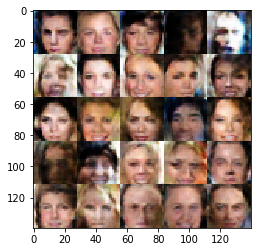

Epoch 1/1... Batch 4510...Discriminator Loss: 0.6092... Generator Loss: 2.0419
Epoch 1/1... Batch 4520...Discriminator Loss: 0.6523... Generator Loss: 3.1124
Epoch 1/1... Batch 4530...Discriminator Loss: 0.5745... Generator Loss: 3.0924
Epoch 1/1... Batch 4540...Discriminator Loss: 0.4892... Generator Loss: 2.7052
Epoch 1/1... Batch 4550...Discriminator Loss: 0.6790... Generator Loss: 2.1063
Epoch 1/1... Batch 4560...Discriminator Loss: 0.5406... Generator Loss: 2.0336
Epoch 1/1... Batch 4570...Discriminator Loss: 0.6107... Generator Loss: 1.6726
Epoch 1/1... Batch 4580...Discriminator Loss: 0.9100... Generator Loss: 1.2535
Epoch 1/1... Batch 4590...Discriminator Loss: 0.6432... Generator Loss: 2.7096
Epoch 1/1... Batch 4600...Discriminator Loss: 0.5845... Generator Loss: 3.8775


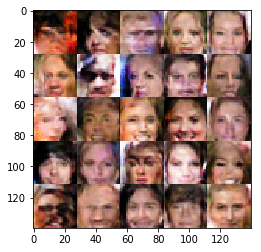

Epoch 1/1... Batch 4610...Discriminator Loss: 0.5122... Generator Loss: 3.4110
Epoch 1/1... Batch 4620...Discriminator Loss: 0.6710... Generator Loss: 3.9219
Epoch 1/1... Batch 4630...Discriminator Loss: 0.5492... Generator Loss: 3.1230
Epoch 1/1... Batch 4640...Discriminator Loss: 0.8429... Generator Loss: 1.5606
Epoch 1/1... Batch 4650...Discriminator Loss: 0.6161... Generator Loss: 2.7083
Epoch 1/1... Batch 4660...Discriminator Loss: 1.2895... Generator Loss: 1.2782
Epoch 1/1... Batch 4670...Discriminator Loss: 0.5384... Generator Loss: 3.0655
Epoch 1/1... Batch 4680...Discriminator Loss: 0.7837... Generator Loss: 1.5830
Epoch 1/1... Batch 4690...Discriminator Loss: 0.6096... Generator Loss: 3.4216
Epoch 1/1... Batch 4700...Discriminator Loss: 0.5958... Generator Loss: 2.9339


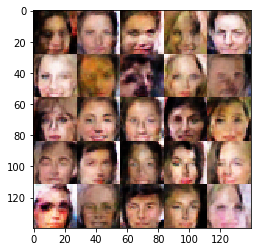

Epoch 1/1... Batch 4710...Discriminator Loss: 0.7298... Generator Loss: 2.5661
Epoch 1/1... Batch 4720...Discriminator Loss: 0.5266... Generator Loss: 3.1159
Epoch 1/1... Batch 4730...Discriminator Loss: 1.2094... Generator Loss: 4.2526
Epoch 1/1... Batch 4740...Discriminator Loss: 0.5232... Generator Loss: 2.6842
Epoch 1/1... Batch 4750...Discriminator Loss: 0.6400... Generator Loss: 1.5687
Epoch 1/1... Batch 4760...Discriminator Loss: 0.5656... Generator Loss: 3.1201
Epoch 1/1... Batch 4770...Discriminator Loss: 0.9024... Generator Loss: 3.3838
Epoch 1/1... Batch 4780...Discriminator Loss: 0.8593... Generator Loss: 3.9183
Epoch 1/1... Batch 4790...Discriminator Loss: 0.5313... Generator Loss: 3.6741
Epoch 1/1... Batch 4800...Discriminator Loss: 0.7460... Generator Loss: 1.7007


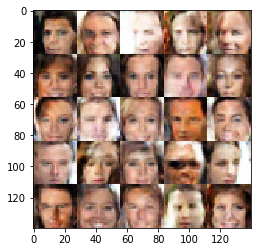

Epoch 1/1... Batch 4810...Discriminator Loss: 0.7550... Generator Loss: 1.5505
Epoch 1/1... Batch 4820...Discriminator Loss: 0.6133... Generator Loss: 3.2245
Epoch 1/1... Batch 4830...Discriminator Loss: 1.0692... Generator Loss: 1.6543
Epoch 1/1... Batch 4840...Discriminator Loss: 0.5626... Generator Loss: 3.4002
Epoch 1/1... Batch 4850...Discriminator Loss: 0.6598... Generator Loss: 1.7871
Epoch 1/1... Batch 4860...Discriminator Loss: 0.5736... Generator Loss: 2.2080
Epoch 1/1... Batch 4870...Discriminator Loss: 0.6050... Generator Loss: 2.8383
Epoch 1/1... Batch 4880...Discriminator Loss: 0.6231... Generator Loss: 2.1259
Epoch 1/1... Batch 4890...Discriminator Loss: 0.5479... Generator Loss: 2.9740
Epoch 1/1... Batch 4900...Discriminator Loss: 0.9728... Generator Loss: 1.2421


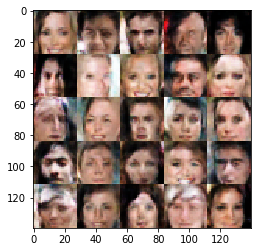

Epoch 1/1... Batch 4910...Discriminator Loss: 0.6474... Generator Loss: 2.0155
Epoch 1/1... Batch 4920...Discriminator Loss: 0.7576... Generator Loss: 2.9084
Epoch 1/1... Batch 4930...Discriminator Loss: 0.5402... Generator Loss: 2.7807
Epoch 1/1... Batch 4940...Discriminator Loss: 0.5958... Generator Loss: 2.7488
Epoch 1/1... Batch 4950...Discriminator Loss: 0.7401... Generator Loss: 1.7660
Epoch 1/1... Batch 4960...Discriminator Loss: 0.6958... Generator Loss: 2.0495
Epoch 1/1... Batch 4970...Discriminator Loss: 0.5393... Generator Loss: 2.4916
Epoch 1/1... Batch 4980...Discriminator Loss: 0.6379... Generator Loss: 2.5532
Epoch 1/1... Batch 4990...Discriminator Loss: 0.6116... Generator Loss: 2.3436
Epoch 1/1... Batch 5000...Discriminator Loss: 0.6320... Generator Loss: 2.1524


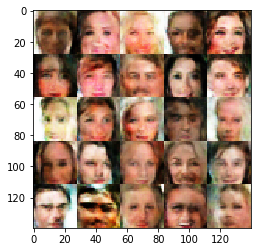

Epoch 1/1... Batch 5010...Discriminator Loss: 0.7653... Generator Loss: 1.8027
Epoch 1/1... Batch 5020...Discriminator Loss: 0.5815... Generator Loss: 1.9548
Epoch 1/1... Batch 5030...Discriminator Loss: 1.2503... Generator Loss: 4.5192
Epoch 1/1... Batch 5040...Discriminator Loss: 0.6163... Generator Loss: 2.5472
Epoch 1/1... Batch 5050...Discriminator Loss: 0.6250... Generator Loss: 1.9559
Epoch 1/1... Batch 5060...Discriminator Loss: 0.4899... Generator Loss: 3.6402
Epoch 1/1... Batch 5070...Discriminator Loss: 0.4590... Generator Loss: 3.5145
Epoch 1/1... Batch 5080...Discriminator Loss: 0.7521... Generator Loss: 1.8340
Epoch 1/1... Batch 5090...Discriminator Loss: 0.5267... Generator Loss: 2.7236
Epoch 1/1... Batch 5100...Discriminator Loss: 0.5536... Generator Loss: 3.2764


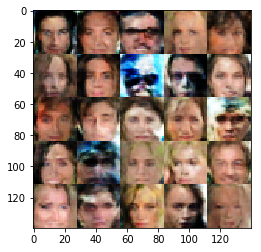

Epoch 1/1... Batch 5110...Discriminator Loss: 0.7526... Generator Loss: 2.1607
Epoch 1/1... Batch 5120...Discriminator Loss: 0.7579... Generator Loss: 3.5427
Epoch 1/1... Batch 5130...Discriminator Loss: 0.8544... Generator Loss: 2.3279
Epoch 1/1... Batch 5140...Discriminator Loss: 0.4658... Generator Loss: 3.7235
Epoch 1/1... Batch 5150...Discriminator Loss: 0.6972... Generator Loss: 2.1800
Epoch 1/1... Batch 5160...Discriminator Loss: 0.6301... Generator Loss: 1.4416
Epoch 1/1... Batch 5170...Discriminator Loss: 0.5971... Generator Loss: 2.4586
Epoch 1/1... Batch 5180...Discriminator Loss: 0.7087... Generator Loss: 2.1356
Epoch 1/1... Batch 5190...Discriminator Loss: 0.7956... Generator Loss: 2.5611
Epoch 1/1... Batch 5200...Discriminator Loss: 0.8123... Generator Loss: 2.2108


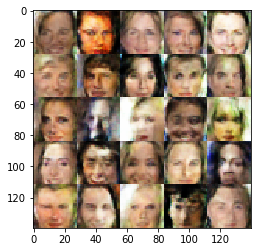

Epoch 1/1... Batch 5210...Discriminator Loss: 0.6330... Generator Loss: 2.6836
Epoch 1/1... Batch 5220...Discriminator Loss: 0.5618... Generator Loss: 3.3395
Epoch 1/1... Batch 5230...Discriminator Loss: 0.5642... Generator Loss: 1.9741
Epoch 1/1... Batch 5240...Discriminator Loss: 1.1351... Generator Loss: 1.3227
Epoch 1/1... Batch 5250...Discriminator Loss: 0.6331... Generator Loss: 2.1366
Epoch 1/1... Batch 5260...Discriminator Loss: 0.7042... Generator Loss: 2.5663
Epoch 1/1... Batch 5270...Discriminator Loss: 0.5653... Generator Loss: 3.0225
Epoch 1/1... Batch 5280...Discriminator Loss: 0.5517... Generator Loss: 3.6100
Epoch 1/1... Batch 5290...Discriminator Loss: 0.6354... Generator Loss: 1.8525
Epoch 1/1... Batch 5300...Discriminator Loss: 0.5443... Generator Loss: 3.2577


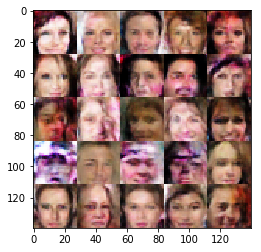

Epoch 1/1... Batch 5310...Discriminator Loss: 0.9306... Generator Loss: 3.5704
Epoch 1/1... Batch 5320...Discriminator Loss: 0.6636... Generator Loss: 2.1991
Epoch 1/1... Batch 5330...Discriminator Loss: 0.6117... Generator Loss: 2.0042
Epoch 1/1... Batch 5340...Discriminator Loss: 0.5516... Generator Loss: 3.2097
Epoch 1/1... Batch 5350...Discriminator Loss: 0.6714... Generator Loss: 1.0616
Epoch 1/1... Batch 5360...Discriminator Loss: 0.5462... Generator Loss: 2.7175
Epoch 1/1... Batch 5370...Discriminator Loss: 0.5637... Generator Loss: 2.6816
Epoch 1/1... Batch 5380...Discriminator Loss: 0.8282... Generator Loss: 1.3754
Epoch 1/1... Batch 5390...Discriminator Loss: 0.6222... Generator Loss: 3.4648
Epoch 1/1... Batch 5400...Discriminator Loss: 0.5933... Generator Loss: 2.9526


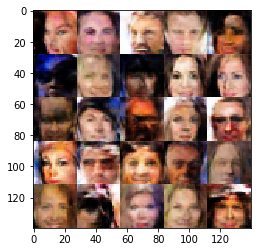

Epoch 1/1... Batch 5410...Discriminator Loss: 0.7463... Generator Loss: 1.8588
Epoch 1/1... Batch 5420...Discriminator Loss: 0.6826... Generator Loss: 1.6958
Epoch 1/1... Batch 5430...Discriminator Loss: 1.0586... Generator Loss: 0.7966
Epoch 1/1... Batch 5440...Discriminator Loss: 0.5050... Generator Loss: 3.4285
Epoch 1/1... Batch 5450...Discriminator Loss: 0.7592... Generator Loss: 2.9704
Epoch 1/1... Batch 5460...Discriminator Loss: 0.5397... Generator Loss: 2.3317
Epoch 1/1... Batch 5470...Discriminator Loss: 0.7403... Generator Loss: 2.9288
Epoch 1/1... Batch 5480...Discriminator Loss: 0.9822... Generator Loss: 4.2515
Epoch 1/1... Batch 5490...Discriminator Loss: 0.7338... Generator Loss: 1.4481
Epoch 1/1... Batch 5500...Discriminator Loss: 0.6636... Generator Loss: 2.5005


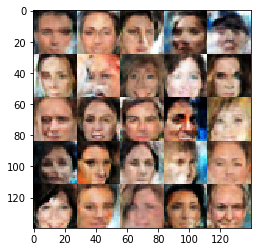

Epoch 1/1... Batch 5510...Discriminator Loss: 0.6553... Generator Loss: 1.7369
Epoch 1/1... Batch 5520...Discriminator Loss: 0.5920... Generator Loss: 2.9237
Epoch 1/1... Batch 5530...Discriminator Loss: 0.5513... Generator Loss: 2.8540
Epoch 1/1... Batch 5540...Discriminator Loss: 0.4975... Generator Loss: 3.1608
Epoch 1/1... Batch 5550...Discriminator Loss: 0.5270... Generator Loss: 2.6005
Epoch 1/1... Batch 5560...Discriminator Loss: 0.7844... Generator Loss: 3.6359
Epoch 1/1... Batch 5570...Discriminator Loss: 0.6077... Generator Loss: 2.5864
Epoch 1/1... Batch 5580...Discriminator Loss: 0.5100... Generator Loss: 2.5054
Epoch 1/1... Batch 5590...Discriminator Loss: 0.7725... Generator Loss: 2.6117
Epoch 1/1... Batch 5600...Discriminator Loss: 0.6206... Generator Loss: 3.8126


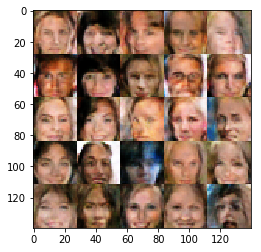

Epoch 1/1... Batch 5610...Discriminator Loss: 0.6209... Generator Loss: 2.7542
Epoch 1/1... Batch 5620...Discriminator Loss: 0.6452... Generator Loss: 4.2508
Epoch 1/1... Batch 5630...Discriminator Loss: 0.5718... Generator Loss: 2.9828
Epoch 1/1... Batch 5640...Discriminator Loss: 0.6389... Generator Loss: 3.4019
Epoch 1/1... Batch 5650...Discriminator Loss: 0.6857... Generator Loss: 3.7397
Epoch 1/1... Batch 5660...Discriminator Loss: 0.6530... Generator Loss: 2.2130
Epoch 1/1... Batch 5670...Discriminator Loss: 0.5103... Generator Loss: 2.5270
Epoch 1/1... Batch 5680...Discriminator Loss: 0.5669... Generator Loss: 2.6709
Epoch 1/1... Batch 5690...Discriminator Loss: 0.8541... Generator Loss: 2.0059
Epoch 1/1... Batch 5700...Discriminator Loss: 0.6625... Generator Loss: 2.3673


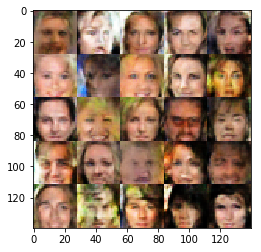

Epoch 1/1... Batch 5710...Discriminator Loss: 0.7315... Generator Loss: 2.4769
Epoch 1/1... Batch 5720...Discriminator Loss: 0.5704... Generator Loss: 2.7178
Epoch 1/1... Batch 5730...Discriminator Loss: 0.5338... Generator Loss: 2.6888
Epoch 1/1... Batch 5740...Discriminator Loss: 0.6895... Generator Loss: 2.4346
Epoch 1/1... Batch 5750...Discriminator Loss: 0.6216... Generator Loss: 2.6174
Epoch 1/1... Batch 5760...Discriminator Loss: 0.4684... Generator Loss: 3.2031
Epoch 1/1... Batch 5770...Discriminator Loss: 0.9644... Generator Loss: 1.2291
Epoch 1/1... Batch 5780...Discriminator Loss: 0.6885... Generator Loss: 2.1683
Epoch 1/1... Batch 5790...Discriminator Loss: 0.5123... Generator Loss: 2.2095
Epoch 1/1... Batch 5800...Discriminator Loss: 0.6759... Generator Loss: 2.9937


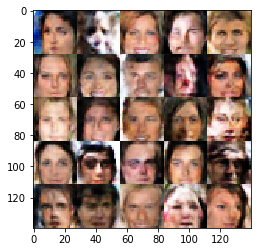

Epoch 1/1... Batch 5810...Discriminator Loss: 0.5113... Generator Loss: 2.5205
Epoch 1/1... Batch 5820...Discriminator Loss: 0.5997... Generator Loss: 1.8722
Epoch 1/1... Batch 5830...Discriminator Loss: 0.8378... Generator Loss: 2.4559
Epoch 1/1... Batch 5840...Discriminator Loss: 0.7462... Generator Loss: 1.7132
Epoch 1/1... Batch 5850...Discriminator Loss: 0.5764... Generator Loss: 3.6336
Epoch 1/1... Batch 5860...Discriminator Loss: 0.6442... Generator Loss: 2.7516
Epoch 1/1... Batch 5870...Discriminator Loss: 0.4784... Generator Loss: 2.4521
Epoch 1/1... Batch 5880...Discriminator Loss: 0.5425... Generator Loss: 2.6617
Epoch 1/1... Batch 5890...Discriminator Loss: 0.4849... Generator Loss: 2.0024
Epoch 1/1... Batch 5900...Discriminator Loss: 0.8894... Generator Loss: 1.3321


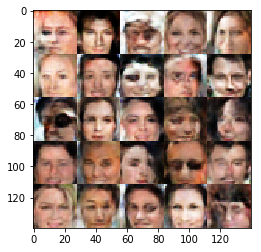

Epoch 1/1... Batch 5910...Discriminator Loss: 0.6641... Generator Loss: 2.1286
Epoch 1/1... Batch 5920...Discriminator Loss: 0.7493... Generator Loss: 1.6369
Epoch 1/1... Batch 5930...Discriminator Loss: 0.5693... Generator Loss: 2.1537
Epoch 1/1... Batch 5940...Discriminator Loss: 0.5645... Generator Loss: 3.2898
Epoch 1/1... Batch 5950...Discriminator Loss: 0.7875... Generator Loss: 3.4465
Epoch 1/1... Batch 5960...Discriminator Loss: 0.6023... Generator Loss: 2.0235
Epoch 1/1... Batch 5970...Discriminator Loss: 0.5980... Generator Loss: 3.7264
Epoch 1/1... Batch 5980...Discriminator Loss: 0.7425... Generator Loss: 2.3436
Epoch 1/1... Batch 5990...Discriminator Loss: 0.5437... Generator Loss: 3.1852
Epoch 1/1... Batch 6000...Discriminator Loss: 0.6407... Generator Loss: 1.9919


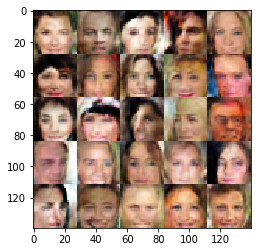

Epoch 1/1... Batch 6010...Discriminator Loss: 0.5218... Generator Loss: 2.0962
Epoch 1/1... Batch 6020...Discriminator Loss: 0.8935... Generator Loss: 4.1898
Epoch 1/1... Batch 6030...Discriminator Loss: 1.5061... Generator Loss: 0.9796
Epoch 1/1... Batch 6040...Discriminator Loss: 0.7265... Generator Loss: 2.2061
Epoch 1/1... Batch 6050...Discriminator Loss: 0.5713... Generator Loss: 3.9149
Epoch 1/1... Batch 6060...Discriminator Loss: 0.5433... Generator Loss: 3.0394
Epoch 1/1... Batch 6070...Discriminator Loss: 0.6031... Generator Loss: 2.7102
Epoch 1/1... Batch 6080...Discriminator Loss: 0.9753... Generator Loss: 1.9351
Epoch 1/1... Batch 6090...Discriminator Loss: 0.7588... Generator Loss: 4.0353
Epoch 1/1... Batch 6100...Discriminator Loss: 0.6025... Generator Loss: 3.0119


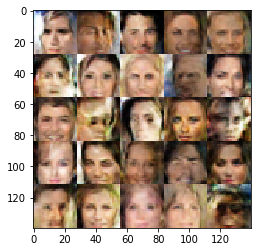

Epoch 1/1... Batch 6110...Discriminator Loss: 0.5621... Generator Loss: 3.0628
Epoch 1/1... Batch 6120...Discriminator Loss: 0.5595... Generator Loss: 1.9815
Epoch 1/1... Batch 6130...Discriminator Loss: 1.1923... Generator Loss: 1.0223
Epoch 1/1... Batch 6140...Discriminator Loss: 1.1743... Generator Loss: 1.2730
Epoch 1/1... Batch 6150...Discriminator Loss: 0.6752... Generator Loss: 2.3840
Epoch 1/1... Batch 6160...Discriminator Loss: 0.6468... Generator Loss: 2.9039
Epoch 1/1... Batch 6170...Discriminator Loss: 0.5070... Generator Loss: 3.5514
Epoch 1/1... Batch 6180...Discriminator Loss: 0.7551... Generator Loss: 1.9054
Epoch 1/1... Batch 6190...Discriminator Loss: 0.5482... Generator Loss: 3.0054
Epoch 1/1... Batch 6200...Discriminator Loss: 0.5448... Generator Loss: 3.0837


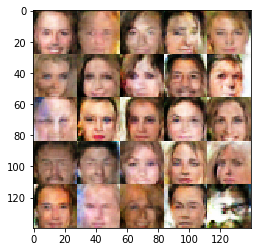

Epoch 1/1... Batch 6210...Discriminator Loss: 0.4285... Generator Loss: 4.2952
Epoch 1/1... Batch 6220...Discriminator Loss: 0.5022... Generator Loss: 3.9462
Epoch 1/1... Batch 6230...Discriminator Loss: 1.0272... Generator Loss: 1.7825
Epoch 1/1... Batch 6240...Discriminator Loss: 0.9726... Generator Loss: 1.5229
Epoch 1/1... Batch 6250...Discriminator Loss: 0.7185... Generator Loss: 3.4300
Epoch 1/1... Batch 6260...Discriminator Loss: 0.5981... Generator Loss: 2.9324
Epoch 1/1... Batch 6270...Discriminator Loss: 0.5354... Generator Loss: 3.3610
Epoch 1/1... Batch 6280...Discriminator Loss: 0.6388... Generator Loss: 2.9795
Epoch 1/1... Batch 6290...Discriminator Loss: 0.6721... Generator Loss: 3.5750
Epoch 1/1... Batch 6300...Discriminator Loss: 0.5913... Generator Loss: 3.5060


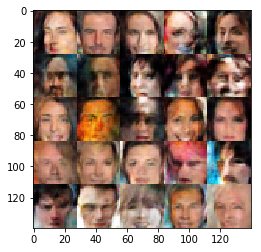

Epoch 1/1... Batch 6310...Discriminator Loss: 0.4824... Generator Loss: 3.1415
Epoch 1/1... Batch 6320...Discriminator Loss: 0.4794... Generator Loss: 2.8591
Epoch 1/1... Batch 6330...Discriminator Loss: 0.5237... Generator Loss: 2.5140


In [56]:
batch_size = 32
z_dim = 128
learning_rate = 0.0006
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.